In [1]:
def aStarAlgo(start_node, stop_node):
         
    open_set = set(start_node) 
    closed_set = set()
    g = {} #store distance from starting node
    parents = {}# parents contains an adjacency map of all nodes

    #ditance of starting node from itself is zero
    g[start_node] = 0
    #start_node is root node i.e it has no parent nodes
    #so start_node is set to its own parent node
    parents[start_node] = start_node
        
        
    while len(open_set) > 0:
        n = None

        #node with lowest f() is found
        for v in open_set:
            if n == None or g[v] + heuristic(v) < g[n] + heuristic(n):
                n = v
            
                    
        if n == stop_node or Graph_nodes[n] == None:
            pass
        else:
            for (m, weight) in get_neighbors(n):
                #nodes 'm' not in first and last set are added to first
                #n is set its parent
                if m not in open_set and m not in closed_set:
                    open_set.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight
                        
    
                #for each node m,compare its distance from start i.e g(m) to the
                #from start through n node
                else:
                    if g[m] > g[n] + weight:
                        #update g(m)
                        g[m] = g[n] + weight
                        #change parent of m to n
                        parents[m] = n
                            
                        #if m in closed set,remove and add to open
                        if m in closed_set:
                            closed_set.remove(m)
                            open_set.add(m)

        if n == None:
            print('Path does not exist!')
            return None

        # if the current node is the stop_node
        # then we begin reconstructin the path from it to the start_node
        if n == stop_node:
            path = []

            while parents[n] != n:
                path.append(n)
                n = parents[n]

            path.append(start_node)

            path.reverse()

            print('Path found: {}'.format(path))
            return path


        # remove n from the open_list, and add it to closed_list
        # because all of his neighbors were inspected
        open_set.remove(n)
        closed_set.add(n)

    print('Path does not exist!')
    return None

In [2]:
def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None

def heuristic(n):
    H_dist = {
        'A': 11,
        'B': 6,
        'C': 99,
        'D': 1,
        'E': 7,
        'F': 0,
        'G': 0,
        'H': 0,
    }

    return H_dist[n]

In [3]:
# Test Case - 1
print("Test Case - 1")
Graph_nodes = {
    'A': [('B', 2), ('E', 3)],
    'B': [('C', 1),('G', 9)],
    'C': None,
    'E': [('D', 6)],
    'D': [('G', 1)],    
}
aStarAlgo('A', 'G')

Test Case - 1
Path found: ['A', 'E', 'D', 'G']


['A', 'E', 'D', 'G']

In [4]:
# Test Case - 2
print("Test Case - 2")
Graph_nodes = {
    'A': [('B', 2), ('D', 2), ('C', 1)],
    'B': [('D', 1), ('A', 2)],
    'C': [('A', 1), ('F', 5)],
    'D': [('E', 3), ('F', 1), ('A', 2), ('B', 1)],
    'E': [('F', 1), ('D', 3)],
    'F': [('G', 2), ('H', 2), ('C', 5), ('D', 1)],
    'G': [('H', 1), ('F', 2)],
    'H': [('F', 2), ('G', 1)]
}
aStarAlgo('A', 'H')

Test Case - 2
Path found: ['A', 'D', 'F', 'H']


['A', 'D', 'F', 'H']

<!-- Show Image  -->
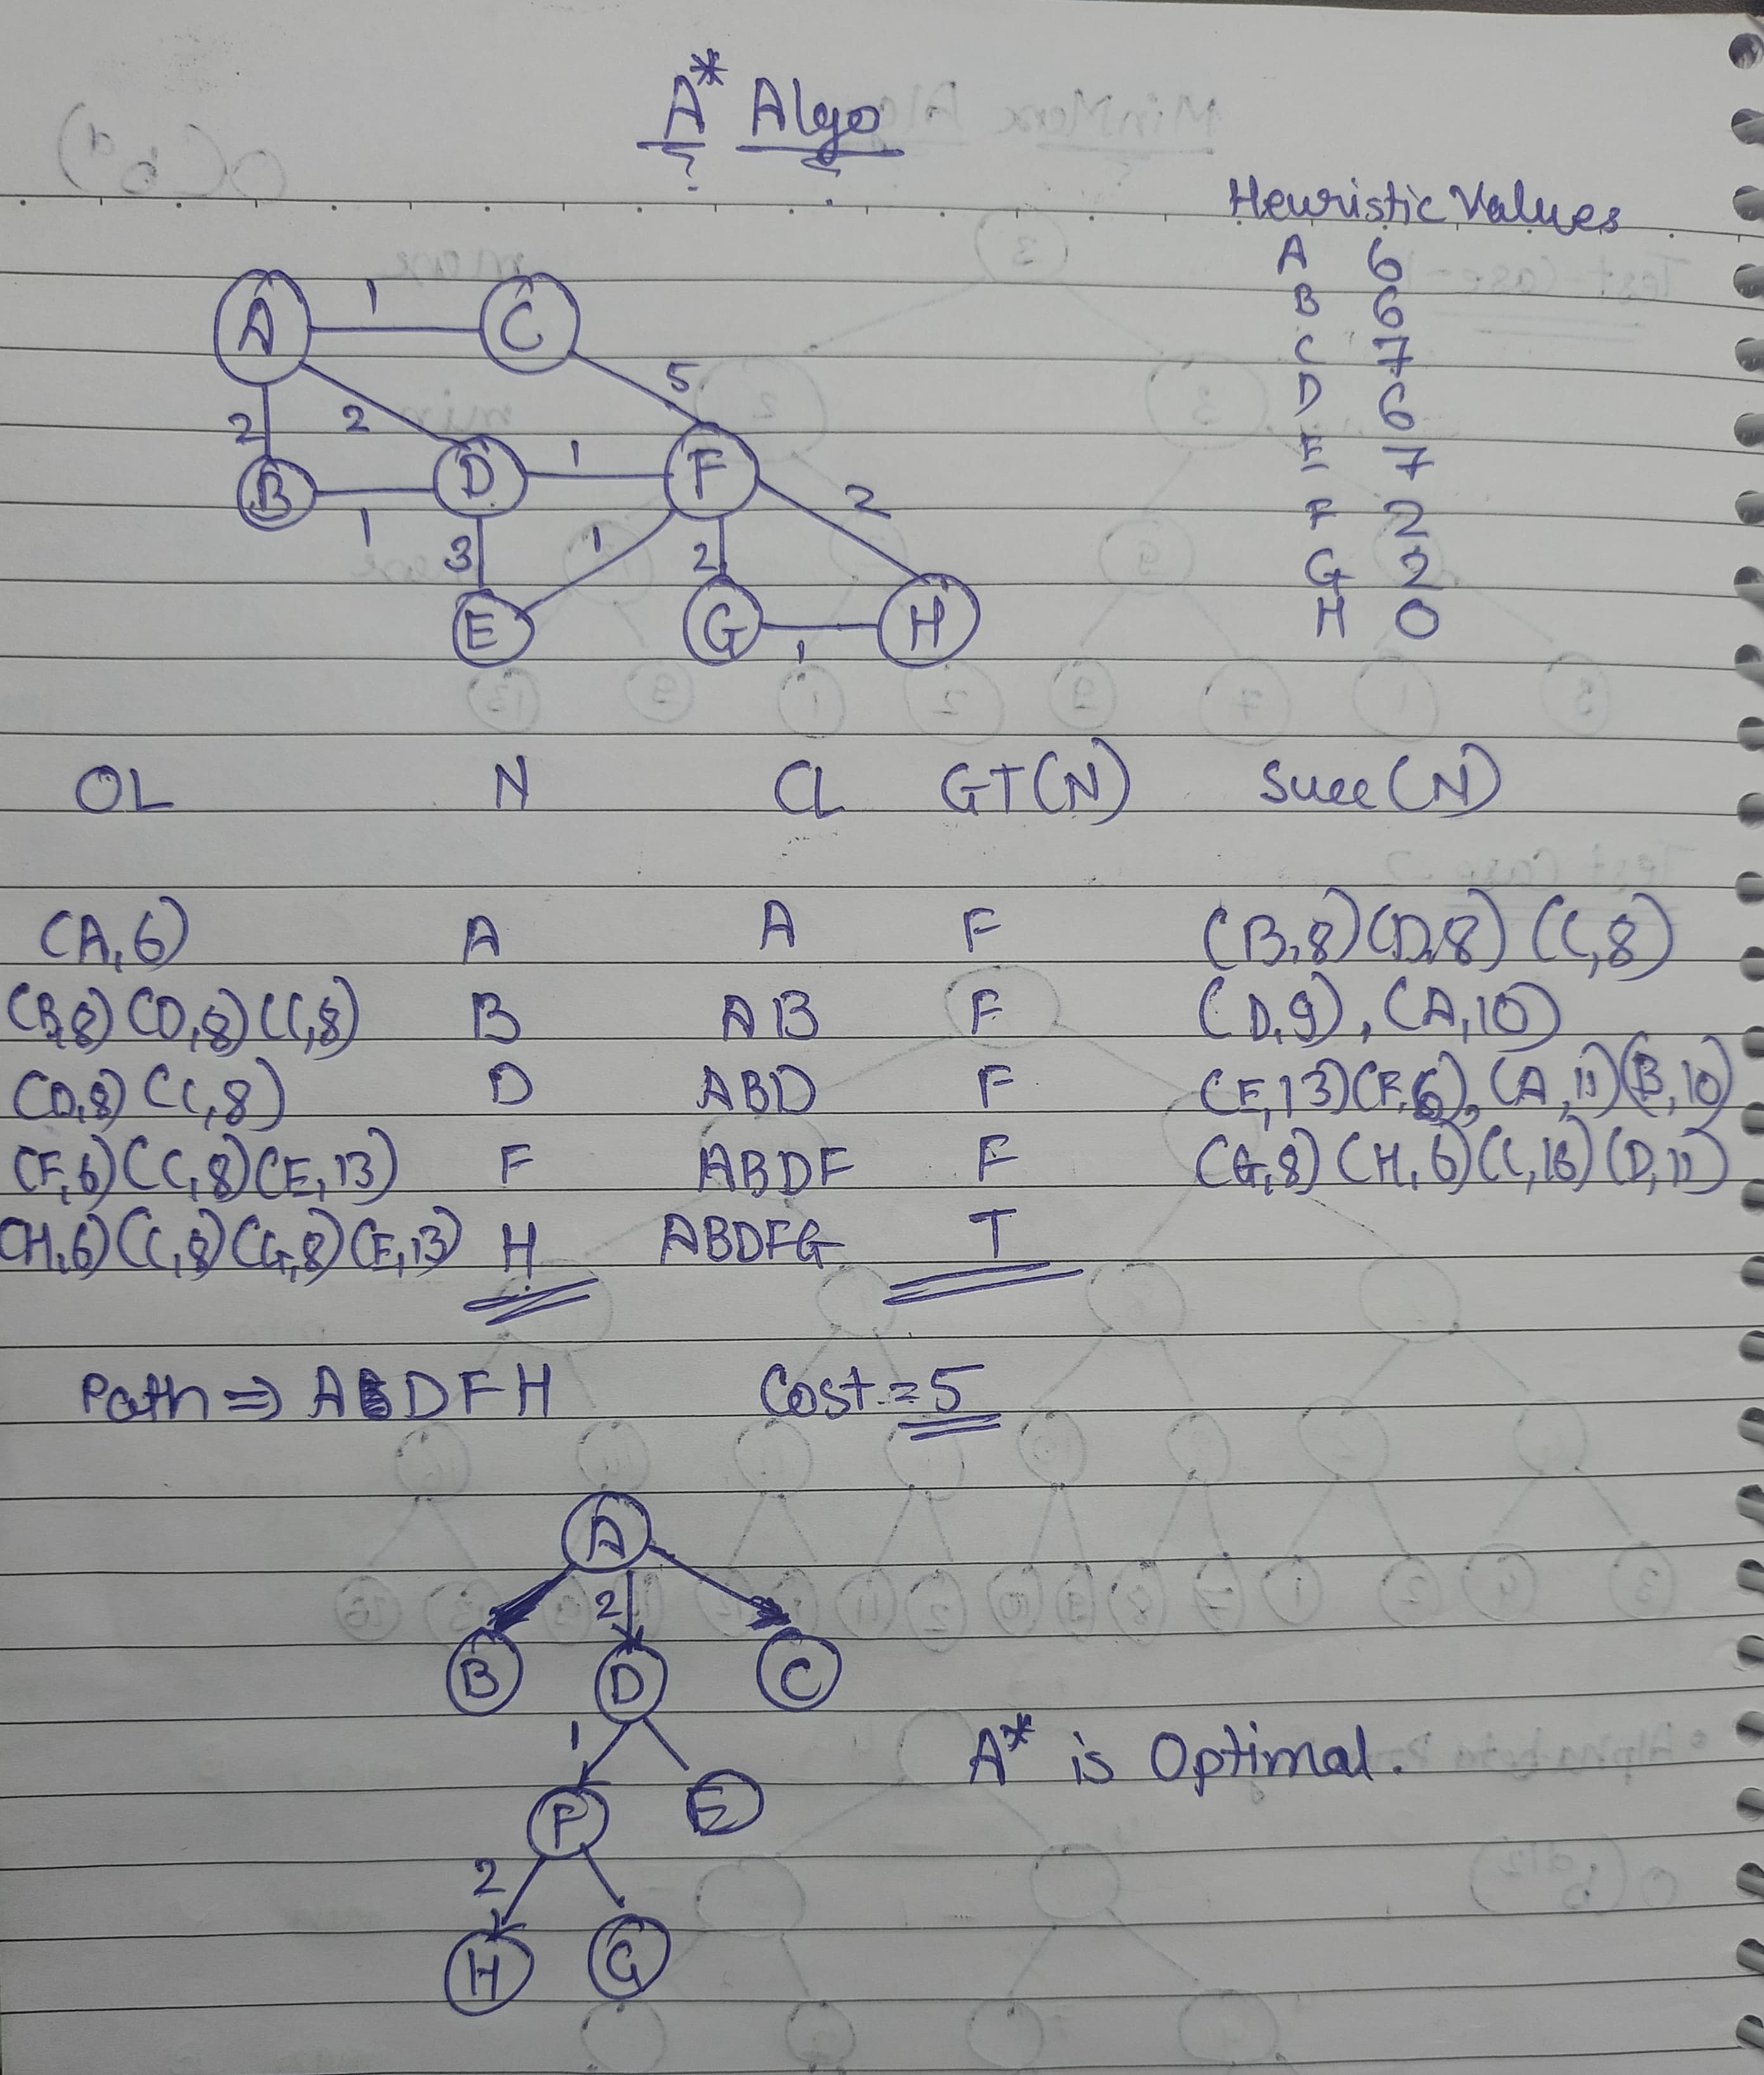
